# Module 6: Root fining and optimization


Finding an extremum (minimum or maximum) of a function $f(x)$ of a single variable, we need to solve the equation $f’(x)=0$, assuming $f(x)$ is differentiable. Hence, we start with the problem of root fining.


## Root finding in 1D: [Bisection method](https://en.wikipedia.org/wiki/Bisection_method)

Given the interval $[a, b]$ such that $f(a)f(b) < 0$, i.e., $f(a)$ has the opposite sign of $f(b)$, find $x \in [a, b]$, such that $f(x) = 0$.

In [1]:
function bisection(f::Function, a::Real, b::Real; max_nsteps::Int = 1000, abstol::Real = 1e-15)
    
    @assert f(a) * f(b) < 0
    
    mid = a + (b - a) / 2
    
    for step = 1:max_nsteps
        
        @show mid
        
        if abs(f(mid)) < abstol
            return mid
        end
        
        if f(a) * f(mid) < 0
           b = mid 
        else 
            # f(mid) * f(b) < 0
            a = mid
        end
        
        mid = a + (b - a) / 2
    end
    
    println("Maximum number of iterations is reached")
    
    return mid
end

bisection (generic function with 1 method)

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


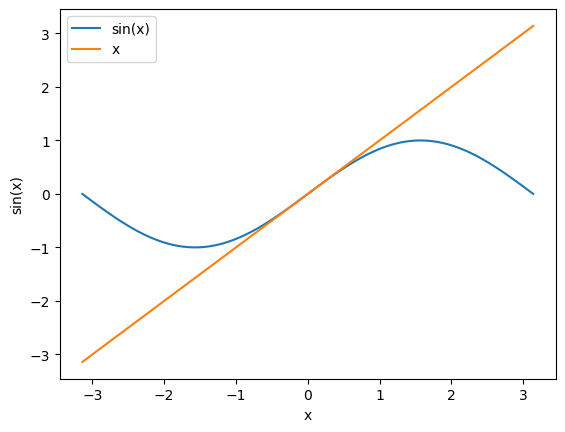

In [2]:
using PyPlot

x = range(-π, π, 100)

plot(x, sin.(x), label="sin(x)")
plot(x, x, label="x")

legend()
xlabel("x")
ylabel("sin(x)")
show()

In [3]:
bisection(sin, -1.5, 3)

mid = 0.75
mid = -0.375
mid = 0.1875
mid = -0.09375
mid = 0.046875
mid = -0.0234375
mid = 0.01171875
mid = -0.005859375
mid = 0.0029296875
mid = -0.00146484375
mid = 0.000732421875
mid = -0.0003662109375
mid = 0.00018310546875
mid = -9.1552734375e-5
mid = 4.57763671875e-5
mid = -2.288818359375e-5
mid = 1.1444091796875e-5
mid = -5.7220458984375e-6
mid = 2.86102294921875e-6
mid = -1.430511474609375e-6
mid = 7.152557373046875e-7
mid = -3.5762786865234375e-7
mid = 1.7881393432617188e-7
mid = -8.940696716308594e-8
mid = 4.470348358154297e-8
mid = -2.2351741790771484e-8
mid = 1.1175870895385742e-8
mid = -5.587935447692871e-9
mid = 2.7939677238464355e-9
mid = -1.3969838619232178e-9
mid = 6.984919309616089e-10
mid = -3.4924596548080444e-10
mid = 1.7462298274040222e-10
mid = -8.731149137020111e-11
mid = 4.3655745685100555e-11
mid = -2.1827872842550278e-11
mid = 1.0913936421275139e-11
mid = -5.4569682106375694e-12
mid = 2.7284841053187847e-12
mid = -1.3642420526593924e-12
mid = 6.821210263296962

6.661338147750939e-16

## [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) in 1D

[This is an iterative method](http://dlmf.nist.gov/3.8.ii) for real twice-continuously differentiable, or complex analytic, function:

$$
    x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

Note that there are [cases](https://en.wikipedia.org/wiki/Newton%27s_method) when the method does not converge. 

![!](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton_iteration.svg/554px-Newton_iteration.svg.png)

In [4]:
function newton(f::Function, diff_f::Function, x₀; max_nsteps::Int = 1000, abstol::Real = 1e-15)
     xₙ = x₀
    
    for step = 1:max_nsteps
        
        if abs(f(xₙ)) < abstol
           return xₙ 
        end
        
        # xₙ = xₙ - f(xₙ) / diff_f(xₙ)
        xₙ -= f(xₙ) / diff_f(xₙ)
        
        @show xₙ
    end
    
    println("Maximum number of iterations is reached")
    
    return xₙ 
end

newton (generic function with 1 method)

In [5]:
newton(sin, cos, -1.5)

xₙ = 12.60141994717172
xₙ = 12.566356255118672
xₙ = 12.566370614359174
xₙ = 12.566370614359172


12.566370614359172

In [6]:
12.566370614359172 / (π)

4.0

## Fixed-Point Iterations

The fixed point is a solution to the equation

$$x = f(x).$$

The fixed point is easy to find via the following simple iterative procedure: $x_{n+1} = f(x_n)$. [Under certain conitions](https://en.wikipedia.org/wiki/Fixed-point_theorem), $x_n$ is guaranteed to converge to the fixed point as $n\to\infty$.

In [7]:
function fixed_point(f::Function, x₀; max_nsteps::Int = 1000, abstol::Real = 1e-15)
    xₙ = xₙ₊₁ = x₀
    
    for step = 1:max_nsteps
        
        xₙ₊₁ = f(xₙ)
        
        if abs(xₙ - xₙ₊₁) < abstol
            return xₙ
        end
        
        xₙ = xₙ₊₁ 
        
        @show xₙ
    end
    
    println("Maximum number of iterations is reached")
    
    return xₙ 
end

fixed_point (generic function with 1 method)

In [8]:
fixed_point(sin, 0.25)

xₙ = 0.24740395925452294
xₙ = 0.24488779227422167
xₙ = 0.24244746635891098
xₙ = 0.2400792291404323
xₙ = 0.23777958395381066
xₙ = 0.23554526780759885
xₙ = 0.23337323163481075
xₙ = 0.23126062255013285
xₙ = 0.22920476787653393
xₙ = 0.22720316073613017
xₙ = 0.22525344702716119
xₙ = 0.22335341363196864
xₙ = 0.2215009777205821
xₙ = 0.21969417703143557
xₙ = 0.21793116102529686
xₙ = 0.21621018282105392
xₙ = 0.21452959183286896
xₙ = 0.21288782703763362
xₙ = 0.21128341080984983
xₙ = 0.20971494326819645
xₙ = 0.20818109708427268
xₙ = 0.20668061270946184
xₙ = 0.2052122939806396
xₙ = 0.2037750040696522
xₙ = 0.20236766174518792
xₙ = 0.2009892379189273
xₙ = 0.1996387524507407
xₙ = 0.1983152711902526
xₙ = 0.1970179032343564
xₙ = 0.19574579838227227
xₙ = 0.19449814477153077
xₙ = 0.19327416667985736
xₙ = 0.19207312247935696
xₙ = 0.19089430273066899
xₙ = 0.189737028405902
xₙ = 0.1886006492301776
xₙ = 0.18748454213253044
xₙ = 0.18638810979773407
xₙ = 0.18531077931136491
xₙ = 0.18425200089108462
xₙ = 0.1832

xₙ = 0.08330219659447732
xₙ = 0.08320588747223559
xₙ = 0.08310991192789284
xₙ = 0.08301426803918087
xₙ = 0.08291895389930999
xₙ = 0.08282396761680913
xₙ = 0.08272930731536789
xₙ = 0.08263497113368062
xₙ = 0.08254095722529249
xₙ = 0.08244726375844738
xₙ = 0.08235388891593778
xₙ = 0.08226083089495653
xₙ = 0.08216808790695034
xₙ = 0.0820756581774752
xₙ = 0.08198353994605355
xₙ = 0.08189173146603325
xₙ = 0.0818002310044482
xₙ = 0.0817090368418808
xₙ = 0.08161814727232593
xₙ = 0.08152756060305678
xₙ = 0.0814372751544922
xₙ = 0.08134728926006567
xₙ = 0.08125760126609591
xₙ = 0.08116820953165906
xₙ = 0.08107911242846233
xₙ = 0.08099030834071928
xₙ = 0.08090179566502652
xₙ = 0.08081357281024194
xₙ = 0.0807256381973644
xₙ = 0.08063799025941483
xₙ = 0.08055062744131873
xₙ = 0.0804635481997902
xₙ = 0.08037675100321715
xₙ = 0.08029023433154807
xₙ = 0.08020399667617999
xₙ = 0.08011803653984785
xₙ = 0.08003235243651514
xₙ = 0.07994694289126585
xₙ = 0.07986180644019761
xₙ = 0.07977694163031625
xₙ = 0

0.05345592283357173

In [9]:
fixed_point(cos, 0.25)

xₙ = 0.9689124217106447
xₙ = 0.5661963244509127
xₙ = 0.8439474651598078
xₙ = 0.6645181803460104
xₙ = 0.787214004993313
xₙ = 0.7058216222217143
xₙ = 0.761078855759294
xₙ = 0.7240923421872705
xₙ = 0.7491010136260781
xₙ = 0.7323013570816245
xₙ = 0.7436377252305164
xₙ = 0.7360108039022628
xₙ = 0.7411525424307221
xₙ = 0.7376909229991697
xₙ = 0.7400235713587021
xₙ = 0.738452664642206
xₙ = 0.7395110238024618
xₙ = 0.7387981811724498
xₙ = 0.7392783971315969
xₙ = 0.7389549345142898
xₙ = 0.7391728303616282
xₙ = 0.7390260565203767
xₙ = 0.7391249266976642
xₙ = 0.7390583272614917
xₙ = 0.7391031897624654
xₙ = 0.7390729699872061
xₙ = 0.7390933264571526
xₙ = 0.7390796141239898
xₙ = 0.739088850930107
xₙ = 0.7390826289125442
xₙ = 0.7390868201412102
xₙ = 0.7390839968804297
xₙ = 0.7390858986634274
xₙ = 0.7390846175997838
xₙ = 0.7390854805397826
xₙ = 0.7390848992530726
xₙ = 0.7390852908148172
xₙ = 0.7390850270541269
xₙ = 0.7390852047265059
xₙ = 0.7390850850442564
xₙ = 0.7390851656636603
xₙ = 0.7390851113574

0.7390851332151611

In [10]:
fixed_point(x -> exp(-x), 0.25)

xₙ = 0.7788007830714049
xₙ = 0.4589560693076638
xₙ = 0.6319430059834795
xₙ = 0.5315579766395019
xₙ = 0.5876886508726961
xₙ = 0.5556100104627527
xₙ = 0.5737221778988232
xₙ = 0.5634243651210017
xₙ = 0.5692563807119256
xₙ = 0.5659461307216159
xₙ = 0.5678226580691264
xₙ = 0.5667581224502082
xₙ = 0.567361777908229
xₙ = 0.5670193902268157
xₙ = 0.5672135639205953
xₙ = 0.5671034366599815
xₙ = 0.5671658936469909
xₙ = 0.5671304712803379
xₙ = 0.5671505607396377
xₙ = 0.5671391671059771
xₙ = 0.5671456289186934
xₙ = 0.567141964141697
xₙ = 0.5671440425943294
xₙ = 0.5671428638135262
xₙ = 0.5671435323510408
xₙ = 0.56714315319444
xₙ = 0.5671433682305509
xₙ = 0.5671432462742597
xₙ = 0.5671433154409509
xₙ = 0.5671432762135257
xₙ = 0.5671432984610966
xₙ = 0.5671432858435359
xₙ = 0.5671432929995007
xₙ = 0.5671432889410434
xₙ = 0.5671432912427702
xₙ = 0.5671432899373613
xₙ = 0.5671432906777152
xₙ = 0.5671432902578284
xₙ = 0.5671432904959645
xₙ = 0.5671432903609072
xₙ = 0.567143290437504
xₙ = 0.56714329039406

0.5671432904097833

## [Acceleration of Convergence](http://dlmf.nist.gov/3.9)


[Aitken's process](http://dlmf.nist.gov/3.9.iii): Let $s_n = a + c q^n$, where $c$ and $|q| < 1$ is unknown. If $q$ is very close to 1, then the sequence $s_n$ very solwly converges to $a$. In other words we have to evaluate $s_n$ for a very large $n$ to get a good approximation to $a$.

In this case, Aitken's process comes to the rescue!  We just need to know 3 consecutive values $s_{n}, s_{n+1}, s_{n+2}$ to get $a$

$$
    s_n - \frac{(s_{n+1} - s_n)^2}{s_{n+2} - 2 s_{n+1} + s_n} = a.
$$

In [11]:
function Aitken(sₙ, sₙ₊₁, sₙ₊₂)
    
    denominator = sₙ₊₂ - 2 * sₙ₊₁ + sₙ
    
    if abs(denominator) ≈ 0
        return sₙ₊₂
    else
        return sₙ - (sₙ₊₁ - sₙ) ^ 2 / denominator
    end
end

Aitken (generic function with 1 method)

In [12]:
function fixed_point_Aitken(f::Function, x₀; max_nsteps::Int = 1000, abstol::Real = 1e-15)
    xₙ = xₙ₊₁ = x₀
    
    for step = 1:max_nsteps
        
        sₙ = f(xₙ)
        sₙ₊₁ = f(sₙ) # f(f(xₙ))
        sₙ₊₂ = f(sₙ₊₁) # f(f(f(xₙ)))
        
        xₙ₊₁ = Aitken(sₙ, sₙ₊₁, sₙ₊₂)
        
        if abs(xₙ - xₙ₊₁) < abstol
            return xₙ
        end
        
        xₙ = xₙ₊₁ 
        
        @show xₙ
    end
    
    println("Maximum number of iterations is reached")
    
    return xₙ 
end

fixed_point_Aitken (generic function with 1 method)

In [13]:
fixed_point_Aitken(cos, 0.25)

xₙ = 0.7305758113012142
xₙ = 0.739080281588056
xₙ = 0.739085133213572
xₙ = 0.7390851332151607


0.7390851332151607

In [14]:
fixed_point_Aitken(sin, 0.25)

xₙ = 0.1639254865624003
xₙ = 0.10850502105895535
xₙ = 0.07211014406202754
xₙ = 0.048006842964687824
xₙ = 0.03198490241765692
xₙ = 0.02131745236920896
xₙ = 0.014209912845622813
xₙ = 0.009472765063690823
xₙ = 0.006315025877110901
xₙ = 0.004209970866187592
xₙ = 0.002806634659521387
xₙ = 0.0018710940692318633
xₙ = 0.0012474209799365618
xₙ = 0.0008316991125405099
xₙ = 0.0005545821898038256
xₙ = 0.0003682350793442149
xₙ = 0.00024048295398966025
xₙ = 0.00017440878004181622
xₙ = 0.00017440877738919628
xₙ = 0.00014556466071585685
xₙ = 0.00014556465917366695
xₙ = 0.00014556465763147707
xₙ = 0.00014556465608928727
xₙ = 0.00013581514398615157
xₙ = 0.00013581514273354524
xₙ = 0.00013581514148093898
xₙ = 0.00013581514022833273
xₙ = 0.00013581513897572653
xₙ = 0.00013581513772312036
xₙ = 0.00012938328143277103
xₙ = 0.0001293832803498308
xₙ = 0.0001293832792668906
xₙ = 0.00012938327818395043
xₙ = 0.0001293832771010103
xₙ = 0.00012938327601807017
xₙ = 0.0001293832749351301
xₙ = 0.00012938327385219003
x

xₙ = 0.00010078111253264959
xₙ = 0.00010078111202084114
xₙ = 0.00010078111150903269
xₙ = 0.00010078111099722427
xₙ = 0.00010078111048541586
xₙ = 0.00010078110997360745
xₙ = 0.00010078110946179904
xₙ = 0.00010078110894999063
xₙ = 0.00010078110843818224
xₙ = 0.00010078110792637388
xₙ = 0.0001007811074145655
xₙ = 0.00010078110690275714
xₙ = 0.00010078110639094877
xₙ = 9.863351326436817e-5
xₙ = 9.863351278458667e-5
xₙ = 9.863351230480518e-5
xₙ = 9.863351182502368e-5
xₙ = 9.863351134524218e-5
xₙ = 9.863351086546068e-5
xₙ = 9.674628346725589e-5
xₙ = 9.674628301449087e-5
xₙ = 9.674628256172585e-5
xₙ = 9.674628210896082e-5
xₙ = 9.67462816561958e-5
xₙ = 9.67462812034308e-5
xₙ = 9.674628075066582e-5
xₙ = 9.674628029790084e-5
xₙ = 9.674627984513586e-5
xₙ = 9.674627939237088e-5
xₙ = 9.67462789396059e-5
xₙ = 9.506560717634871e-5
xₙ = 9.506560674677245e-5
xₙ = 9.50656063171962e-5
xₙ = 9.506560588761994e-5
xₙ = 9.506560545804368e-5
xₙ = 9.506560502846743e-5
xₙ = 9.506560459889117e-5
xₙ = 9.5065604169

xₙ = 8.428782163599931e-5
xₙ = 8.355285723334109e-5
xₙ = 8.355285694169649e-5
xₙ = 8.35528566500519e-5
xₙ = 8.35528563584073e-5
xₙ = 8.285551546060347e-5
xₙ = 8.28555151762004e-5
xₙ = 8.285551489179732e-5
xₙ = 8.285551460739425e-5
xₙ = 8.285551432299117e-5
xₙ = 8.285551403858814e-5
xₙ = 8.28555137541851e-5
xₙ = 8.285551346978207e-5
xₙ = 8.285551318537903e-5
xₙ = 8.2855512900976e-5
xₙ = 8.285551261657296e-5
xₙ = 8.285551233216993e-5
xₙ = 8.285551204776689e-5
xₙ = 8.285551176336386e-5
xₙ = 8.285551147896082e-5
xₙ = 8.285551119455779e-5
xₙ = 8.285551091015475e-5
xₙ = 8.285551062575172e-5
xₙ = 8.285551034134868e-5
xₙ = 8.285551005694569e-5
xₙ = 8.285550977254269e-5
xₙ = 8.28555094881397e-5
xₙ = 8.28555092037367e-5
xₙ = 8.285550891933371e-5
xₙ = 8.285550863493072e-5
xₙ = 8.285550835052772e-5
xₙ = 8.285550806612473e-5
xₙ = 8.285550778172173e-5
xₙ = 8.285550749731874e-5
xₙ = 8.285550721291574e-5
xₙ = 8.285550692851275e-5
xₙ = 8.285550664410975e-5
xₙ = 8.219236607827601e-5
xₙ = 8.2192365800647

7.782478247998766e-5

## [The Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

is a set of points $\{c\}$ for which the function $f(z) = z^2 + c$ has a finite fixed point when the iteration starts from $z_0 = 0$. $|z_n|$ remains finite as $n \to \infty$ where $z_{n+1} = f(z_{n})$.

  3.207474 seconds (211.15 M allocations: 6.223 GiB, 11.82% gc time, 1.75% compilation time: 18% of which was recompilation)


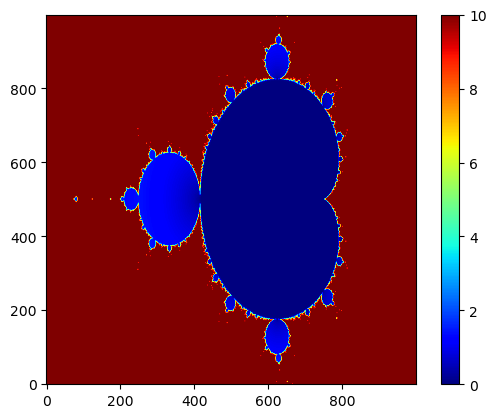

In [15]:
x = range(-2, 1, 1000)
y = range(-1, 1, 1000)

image = zeros(length(y), length(x))

@time begin

Threads.@threads for k = 1:length(x)
    for j = 1:length(y)
    
        c = x[k] + im * y[j]
        
        f(z) = z ^ 2 + c
        
        # Iterating
        zₙ = 0im
        for step = 1:200
            zₙ = f(zₙ) 
        end
        
        # Coloring
        val = abs(f(zₙ) - zₙ)
        if val < 10
            image[j, k] = val
        else
            image[j, k] = 10
        end
    end
end

end

using PyPlot

imshow(image, origin="lower", cmap="jet")
colorbar()
show()

## Introduction to Optimization

Throughout, bold letters (e.g., ${\bf x}$) denote an $n$-dimensional real vector.
The problem of **maximization** (i.e., finding a maximum of a real-valued function), 

$$
    \mbox{maximize }_{{\bf x}} \, f({\bf x})
$$

is equivalent to the **minimization** problem

$$
	\mbox{minimize }_{{\bf x}} \, -f({\bf x}).
$$

Hence we only study the latter problem.

The **constrained minimization**

$$
	\mbox{minimize }_{{\bf x}} \, f({\bf x})
$$
$$
	\mbox{subject to } \, g({\bf x}) = 0,
$$

finding the minimum of the function $f({\bf x})$ under the equality constrain $g({\bf x}) = 0$, can be reduced to the unconstrained minimization via [the method of Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier)

$$
    \mbox{minimize }_{{\bf x}, \lambda} \, f({\bf x}) + \lambda g({\bf x}).
$$


The general problem of constrained minimization

$$
	\mbox{minimize }_{{\bf x}} \, f({\bf x})
$$
$$
	\mbox{subject to } g({\bf x}) = 0
$$
$$
    \qquad\qquad h({\bf x}) \leq 0.
$$

can be transformed into the unconstrained minimization by the following steps

$$
	\mbox{minimize }_{{\bf x}, y} \, f({\bf x})
$$
$$
	\mbox{subject to } g({\bf x}) = 0
$$
$$
    \qquad\qquad\qquad h({\bf x}) + y^2 =  0,
$$

and via the method of Lagrange multipliers we get

$$
	\mbox{minimize }_{{\bf x}, y, \lambda_1, \lambda_2} \, f({\bf x}) + \lambda_1 g({\bf x}) + \lambda_2 \left(h({\bf x}) + y^2\right).
$$

## [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)

An iterative method to find a local minimum of the function $f({\bf x})$,

$$
    {\bf x}_{n+1} = {\bf x}_n - \gamma \nabla f({\bf x}_n), \qquad \gamma > 0.
$$


In [16]:
using LinearAlgebra

function grad_descent(∇f::Function, γ::Real, 𝐱₀::Vector; max_nsteps::Int = 1000, abstol::Real = 1e-10)
     
    𝐱ₙ = 𝐱ₙ₊₁ = 𝐱₀
    
    history_𝐱 = [𝐱₀]
    
    for step = 1:max_nsteps
        
        𝐱ₙ₊₁ = 𝐱ₙ - γ * ∇f(𝐱ₙ)
    
        push!(history_𝐱, 𝐱ₙ₊₁)
        
        if norm(𝐱ₙ₊₁ - 𝐱ₙ) < abstol
           return hcat(history_𝐱...) 
        end
        
        𝐱ₙ = 𝐱ₙ₊₁ 
    end
    
    println("Maximum number of iterations is reached")
    
    return hcat(history_𝐱...)
end

grad_descent (generic function with 1 method)

In [17]:
f(x₁, x₂) = -exp.(-x₁ .^ 2 .- 2 * x₂ .^ 2)

history_𝐱 = grad_descent(
    # ∇f
    𝐱 -> [2 * 𝐱[1], 4 * 𝐱[2]] .* exp(-𝐱[1] ^ 2 - 2 * 𝐱[2] ^ 2),
    
    # γ
    0.1,

    # 𝐱₀
    [1., 1.]
);

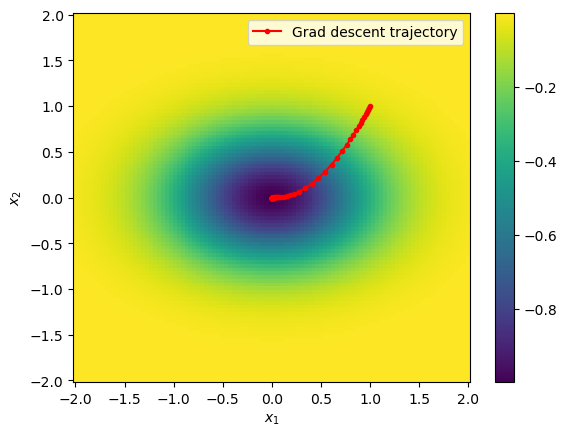

In [18]:
y = range(-2, 2, 100)
x = y'

pcolormesh(x, x, f(x, y))
plot(history_𝐱[1, :], history_𝐱[2, :], "r.-", label="Grad descent trajectory")

xlabel(L"x_1")
ylabel(L"x_2")
legend()
colorbar()
show()

## [Newton's method for minimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)

The iteration scheme that works as follows: Given ${\bf x}_{n}$, find ${\bf x}_{n+1}$ such that

$$
    H({\bf x}_{n}) ({\bf x}_{n+1} - {\bf x}_{n}) = -\nabla f({\bf x}_{n}),
$$

where $H({\bf x}_{n}) = \left( \frac{\partial^2 f({\bf x}_{n})}{\partial x_l \partial x_k} \right)$ is the [Hessian](https://en.wikipedia.org/wiki/Hessian_matrix) - a square matrix of second-order partial derivatives.

Newton's method may not converge if the Hessian is non invertible (its determinant is zero) and the Hessian has a negative eigenvalue.

In [144]:
function newton_min(∇f::Function, Hessian::Function, 𝐱₀::Vector; max_nsteps::Int = 10, abstol::Real = 1e-10)
     
    𝐱ₙ = 𝐱ₙ₊₁ = 𝐱₀
    
    history_𝐱 = [𝐱₀]
   
    for step = 1:max_nsteps
         
        @show eigvals(Hessian(𝐱ₙ))
        @show det(Hessian(𝐱ₙ))
        
        𝐱ₙ₊₁ = 𝐱ₙ - Hessian(𝐱ₙ) \ ∇f(𝐱ₙ)
        
        push!(history_𝐱, 𝐱ₙ₊₁)
        
        if norm(𝐱ₙ₊₁ - 𝐱ₙ) < abstol
           return hcat(history_𝐱...) 
        end
        
        𝐱ₙ = 𝐱ₙ₊₁ 
    end
    
    println("Maximum number of iterations is reached")
    
    return hcat(history_𝐱...)
end

newton_min (generic function with 1 method)

In [148]:
newton_history_𝐱 = newton_min(
    # ∇f
    𝐱 -> [2 * 𝐱[1], 4 * 𝐱[2]] .* exp(-𝐱[1] ^ 2 - 2 * 𝐱[2] ^ 2),
    
    # Hessian
    𝐱 -> [
        [-4 * 𝐱[1] ^ 2 + 2;; -8 * 𝐱[1] * 𝐱[2]];
        [-8 * 𝐱[1] * 𝐱[2];; -16 * 𝐱[2] ^ 2  + 4]
    ] .* exp(-𝐱[1] ^ 2 - 2 * 𝐱[2] ^ 2),

    # 𝐱₀
    [1., 1.]
)

eigvals(Hessian(𝐱ₙ)) = [-0.8181997421778882, 0.12118078502779302]
det(Hessian(𝐱ₙ)) = -0.09915008706665435
eigvals(Hessian(𝐱ₙ)) = [-0.3354652096928592, 0.03222786492514129]
det(Hessian(𝐱ₙ)) = -0.010811327465065664
eigvals(Hessian(𝐱ₙ)) = [-0.13254572865702474, 0.00963859159525106]
det(Hessian(𝐱ₙ)) = -0.0012775541462200267
eigvals(Hessian(𝐱ₙ)) = [-0.05146011783778516, 0.003035115090109301]
det(Hessian(𝐱ₙ)) = -0.0001561873801882646
eigvals(Hessian(𝐱ₙ)) = [-0.01977213586941335, 0.000984813266130153]
det(Hessian(𝐱ₙ)) = -1.9471861703926117e-5
eigvals(Hessian(𝐱ₙ)) = [-0.007544301027035754, 0.0003259556779497609]
det(Hessian(𝐱ₙ)) = -2.459107755924515e-6
eigvals(Hessian(𝐱ₙ)) = [-0.0028643080754745267, 0.00010943103358416896]
det(Hessian(𝐱ₙ)) = -3.134441932026592e-7
eigvals(Hessian(𝐱ₙ)) = [-0.0010833977820994233, 3.71349266774278e-5]
det(Hessian(𝐱ₙ)) = -4.023189720074999e-8
eigvals(Hessian(𝐱ₙ)) = [-0.0004085818635275835, 1.2707927565380889e-5]
det(Hessian(𝐱ₙ)) = -5.19222872623687e-9
eigvals(Hessi

2×11 Matrix{Float64}:
 1.0  1.2  1.35707  1.4921  1.61284  …  1.92181  2.01263  2.099  2.18152
 1.0  1.2  1.35707  1.4921  1.61284     1.92181  2.01263  2.099  2.18152

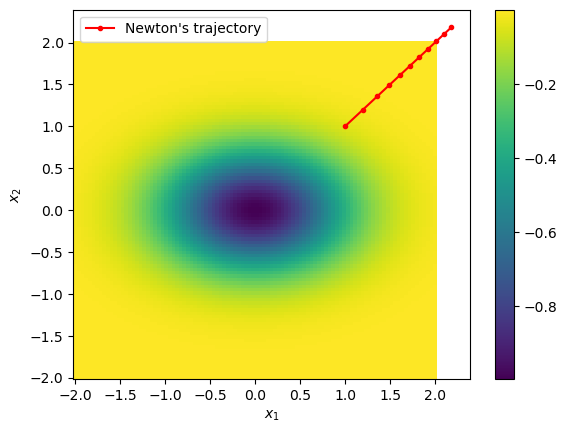

In [149]:
y = range(-2, 2, 100)
x = y'

pcolormesh(x, x, f(x, y))
plot(newton_history_𝐱[1, :], newton_history_𝐱[2, :], "r.-", label="Newton's trajectory")

xlabel(L"x_1")
ylabel(L"x_2")
legend()
colorbar()
show()

## Optimization by using the external libraries: [JuMP](https://jump.dev/) and [NLopt](https://github.com/JuliaOpt/NLopt.jl)

In [159]:
using JuMP
using NLopt

model = Model(NLopt.Optimizer)

@variable(model, y[1:2])

set_start_value(y[1], 1.)
set_start_value(y[2], 1.)

@NLobjective(model, Min, f(y[1], y[2]))

set_optimizer_attribute(model, "algorithm", :LD_TNEWTON_PRECOND)

JuMP.optimize!(model)

┌ Warning: Function f automatically registered with 2 arguments.
│ 
│ Calling the function with a different number of arguments will result in an
│ error.
│ 
│ While you can safely ignore this warning, we recommend that you manually
│ register the function as follows:
│ ```Julia
│ model = Model()
│ register(model, :f, 2, f; autodiff = true)
│ ```
└ @ MathOptInterface.Nonlinear ~/.julia/packages/MathOptInterface/vwZYM/src/Nonlinear/operators.jl:370


In [161]:
value(y[1]), value(y[2])

(1.9852334701272664e-23, 1.3234889800848443e-23)